In [31]:
# Import the Pandas library
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [32]:
csv_path = Path("neighbourhood-crime-rates - 4326.csv")
toronto_df = pd.read_csv(csv_path, low_memory=False)
#toronto_df.head()

In [33]:
#add colunm for distracts
toronto_df["Districts"] =""
toronto_df.head()

,_id,AREA_NAME,HOOD_ID,POPN_PROJ_2022,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,...,THEFTOVER_RATE_2015,THEFTOVER_RATE_2016,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,geometry,Districts
0,1,South Eglinton-Davisville,174,21418,63,61,70,82,85,70,...,16.33453,21.59011,5.237247,15.23229,14.82287,24.19784,28.63415,14.00691,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
1,2,North Toronto,173,14544,45,52,43,52,55,77,...,25.91121,17.30553,24.750430,39.41353,30.23432,43.83081,14.24197,27.50275,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
2,3,Dovercourt Village,172,13789,56,57,79,94,94,96,...,22.21893,37.18025,22.146760,29.14602,21.69825,21.70924,14.54122,29.00863,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
3,4,Junction-Wallace Emerson,171,25777,154,157,166,157,157,182,...,20.97579,24.75350,24.404130,27.95639,15.75485,35.25402,31.30993,31.03542,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",
4,5,Yonge-Bay Corridor,170,14213,394,525,487,603,576,660,...,274.19800,233.30170,289.951100,349.53920,481.90930,259.79810,188.65190,351.79060,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",


In [34]:
#Grouping the values of the Hood Id to the distract 
# Using https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto#East_End to help with the numbers 
#https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas as a source 
toronto_df.loc[(toronto_df.HOOD_ID >0) & (toronto_df.HOOD_ID <22),['Districts']] = "Etobicoke"
toronto_df.loc[(toronto_df.HOOD_ID >23) & (toronto_df.HOOD_ID <54),['Districts']] = "North York"
toronto_df.loc[(toronto_df.HOOD_ID >55) & (toronto_df.HOOD_ID <62),['Districts']] = "East York"
toronto_df.loc[(toronto_df.HOOD_ID >63) & (toronto_df.HOOD_ID <106),['Districts']] = "Old City of Toronto"
toronto_df.loc[(toronto_df.HOOD_ID >107) & (toronto_df.HOOD_ID <116),['Districts']] = "York"
toronto_df.loc[(toronto_df.HOOD_ID >117) & (toronto_df.HOOD_ID <141),['Districts']] = "Scarborough"
toronto_df.loc[(toronto_df.HOOD_ID >141) & (toronto_df.HOOD_ID <175),['Districts']] = "Downtown"

#toronto_df.head() to test 


In [35]:
#reduce to different rates per crime 
toronto_assualt=toronto_df[["AREA_NAME",
                            "Districts",
                            "ASSAULT_2014",
                           "ASSAULT_2015",
                           "ASSAULT_2016",
                           "ASSAULT_2017",
                           "ASSAULT_2018",
                           "ASSAULT_2019",
                           "ASSAULT_2020",
                           "ASSAULT_2021",
                           "ASSAULT_2022"]]
#toronto_assualt.head()

#Grouping by the disricts to make easier 
dis_assu=toronto_assualt.groupby(["Districts"])
#suming the whole thing up for each di
total_2014ass=dis_assu["ASSAULT_2014"].sum()
total_2015ass=dis_assu["ASSAULT_2015"].sum()
total_2016ass=dis_assu["ASSAULT_2016"].sum()
total_2017ass=dis_assu["ASSAULT_2017"].sum()
total_2018ass=dis_assu["ASSAULT_2018"].sum()
total_2019ass=dis_assu["ASSAULT_2019"].sum()
total_2020ass=dis_assu["ASSAULT_2020"].sum()
total_2021ass=dis_assu["ASSAULT_2021"].sum()
total_2022ass=dis_assu["ASSAULT_2022"].sum()
final_ass = pd.DataFrame ({
                           "total_2014":total_2014ass,
                           "total_2015":total_2015ass,
                            "total_2016":total_2016ass,
                           "total_2017":total_2017ass,
                           "total_2018":total_2018ass,
                           "total_2019": total_2019ass,
                           "total_2020": total_2020ass,
                           "total_2021" : total_2021ass,
                           "total_2022" : total_2022ass})

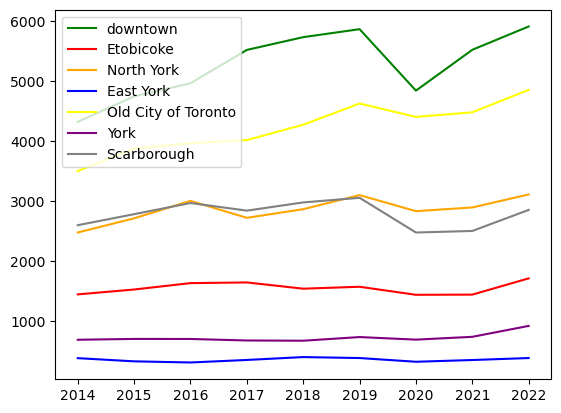

In [54]:
#To graph the data 
year_ass= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_downtown = final_ass.loc["Downtown"]
dis_etob = final_ass.loc["Etobicoke"]
dis_north = final_ass.loc["North York"]
dis_east= final_ass.loc["East York"]
dis_old = final_ass.loc["Old City of Toronto"]
dis_york = final_ass.loc["York"]
dis_scar = final_ass.loc["Scarborough"]

plt.plot( year_ass,dis_downtown, color="green", label="Downtown")
plt.plot( year_ass,dis_etob, color="red", label="Etobicoke")
plt.plot( year_ass,dis_north, color="orange", label="North York")
plt.plot( year_ass,dis_east, color="blue", label="East York")
plt.plot( year_ass,dis_old, color="yellow", label="Old City of Toronto")
plt.plot( year_ass,dis_york, color="purple", label="York")
plt.plot( year_ass,dis_scar, color="grey", label="Scarborough")
plt.legend(loc="best")

plt.show()


In [57]:
#auto thefts in the area
toronto_auto = toronto_df[["AREA_NAME",
                            "Districts",
                            "AUTOTHEFT_2014",
                           "AUTOTHEFT_2015",
                           "AUTOTHEFT_2016",
                           "AUTOTHEFT_2017",
                           "AUTOTHEFT_2018",
                           "AUTOTHEFT_2019",
                           "AUTOTHEFT_2020",
                           "AUTOTHEFT_2021",
                           "AUTOTHEFT_2022"]]
#Grouping by the disricts to make easier 
dis_auto=toronto_auto.groupby(["Districts"])
#suming the whole thing up for each di
total_2014auto=dis_auto["AUTOTHEFT_2014"].sum()
total_2015auto=dis_auto["AUTOTHEFT_2015"].sum()
total_2016auto=dis_auto["AUTOTHEFT_2016"].sum()
total_2017auto=dis_auto["AUTOTHEFT_2017"].sum()
total_2018auto=dis_auto["AUTOTHEFT_2018"].sum()
total_2019auto=dis_auto["AUTOTHEFT_2019"].sum()
total_2020auto=dis_auto["AUTOTHEFT_2020"].sum()
total_2021auto=dis_auto["AUTOTHEFT_2021"].sum()
total_2022auto=dis_auto["AUTOTHEFT_2022"].sum()
final_auto = pd.DataFrame ({
                           "total_2014":total_2014auto,
                           "total_2015":total_2015auto,
                            "total_2016":total_2016auto,
                           "total_2017":total_2017auto,
                           "total_2018":total_2018auto,
                           "total_2019": total_2019auto,
                           "total_2020": total_2020auto,
                           "total_2021" : total_2021auto,
                           "total_2022" : total_2022auto})

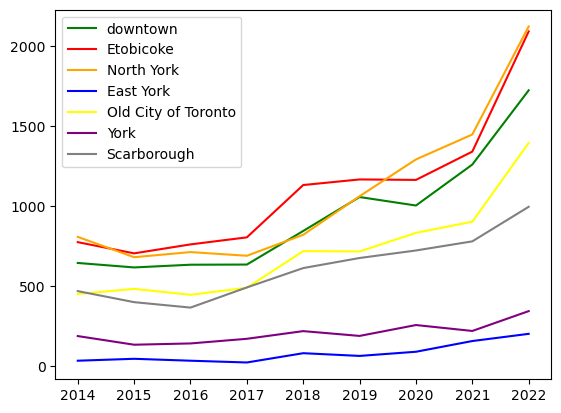

In [58]:
#To graph the data 
year_auto= [2014,2015,2016,2017,2018,2019,2020,2021,2022]
dis_downtown1 = final_auto.loc["Downtown"]
dis_etob1 = final_auto.loc["Etobicoke"]
dis_north1 = final_auto.loc["North York"]
dis_east1= final_auto.loc["East York"]
dis_old1 = final_auto.loc["Old City of Toronto"]
dis_york1 = final_auto.loc["York"]
dis_scar1 = final_auto.loc["Scarborough"]

plt.plot( year_auto,dis_downtown1, color="green", label="downtown")
plt.plot( year_auto,dis_etob1, color="red", label="Etobicoke")
plt.plot( year_auto,dis_north1, color="orange", label="North York")
plt.plot( year_auto,dis_east1, color="blue", label="East York")
plt.plot( year_auto,dis_old1, color="yellow", label="Old City of Toronto")
plt.plot( year_auto,dis_york1, color="purple", label="York")
plt.plot( year_auto,dis_scar1, color="grey", label="Scarborough")
plt.legend(loc="best")

plt.show()

In [ ]:
#breaking and entering in those areas 
toronto_break = toronto_df[["AREA_NAME",
                            "Districts",
                            "BREAKENTER_2014",
                           "BREAKENTER_2015",
                           "BREAKENTER_2016",
                           "BREAKENTER_2017",
                           "BREAKENTER_2018",
                           "BREAKENTER_2019",
                           "BREAKENTER_2020",
                           "BREAKENTER_2021",
                           "BREAKENTER_2022"]]

In [ ]:
#homicides in the area
toronto_homi =toronto_df [["AREA_NAME",
                            "Districts",
                            "HOMICIDE_2014",
                           "HOMICIDE_2015",
                           "HOMICIDE_2016",
                           "HOMICIDE_2017",
                           "HOMICIDE_2018",
                           "HOMICIDE_2019",
                           "HOMICIDE_2020",
                           "HOMICIDE_2021",
                           "HOMICIDE_2022"]]

In [ ]:
#robbery in the areas 
toronto_robbery = toronto_df [["AREA_NAME",
                            "Districts",
                            "ROBBERY_2014",
                            "ROBBERY_2015",
                            "ROBBERY_2016",
                            "ROBBERY_2017",
                            "ROBBERY_2018",
                            "ROBBERY_2019",
                            "ROBBERY_2020",
                            "ROBBERY_2021",
                            "ROBBERY_2022"]]

In [ ]:
#shooting in the area
toronto_shoot = toronto_df [["AREA_NAME",
                            "Districts",
                             "SHOOTING_2014",
                             "SHOOTING_2015",
                             "SHOOTING_2016",
                             "SHOOTING_2017",
                             "SHOOTING_2018",
                             "SHOOTING_2019",
                             "SHOOTING_2020",
                             "SHOOTING_2021",
                             "SHOOTING_2022",]]


In [ ]:
#theft over $5000
toronto_theftover= toronto_df [["AREA_NAME",
                            "Districts",
                            "THEFTOVER_2014",
                            "THEFTOVER_2015",
                            "THEFTOVER_2016",
                            "THEFTOVER_2017",
                            "THEFTOVER_2018",
                            "THEFTOVER_2019",
                            "THEFTOVER_2020",
                             "THEFTOVER_2021",
                            "THEFTOVER_2022"]]                          
